<a href="https://colab.research.google.com/github/DanielTsuyoshi/Redes-Neurais/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Daniel Tsuyoshi Yamamoto

RM: 95344

Turma: 2TDSA

Ano: 2023

## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [1]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

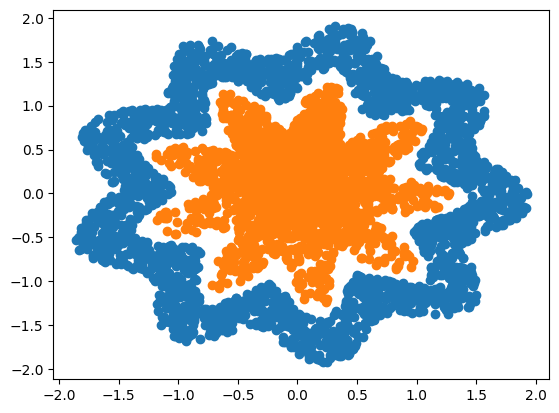

In [2]:
## coloque seu RM aqui!!
RM = [9,5,3,4,4]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
x = np.concatenate([c1, c2])
y = np.concatenate([np.zeros(len(c1)), np.ones(len(c2))])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5371 - val_loss: 0.6647 - val_accuracy: 0.6453
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7880 - val_loss: 0.6100 - val_accuracy: 0.8213
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8429 - val_loss: 0.5552 - val_accuracy: 0.8720
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.8960 - val_loss: 0.5044 - val_accuracy: 0.8940
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.9137 - val_loss: 0.4545 - val_accuracy: 0.9160
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.9311 - val_loss: 0.4072 - val_accuracy: 0.9267
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.9420 - val_loss: 0.3658 - val_accuracy: 0.9347

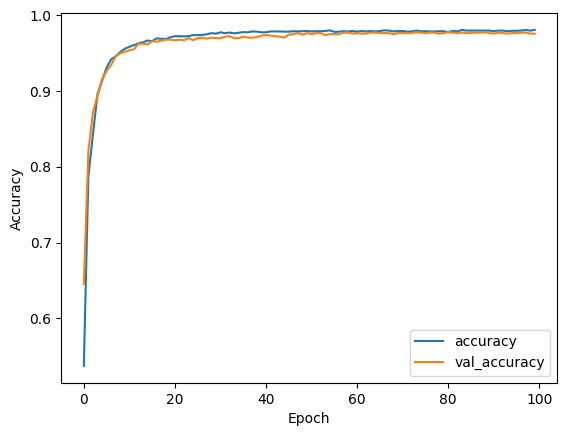

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

5025/5025 [==============================] - 5s 892us/step


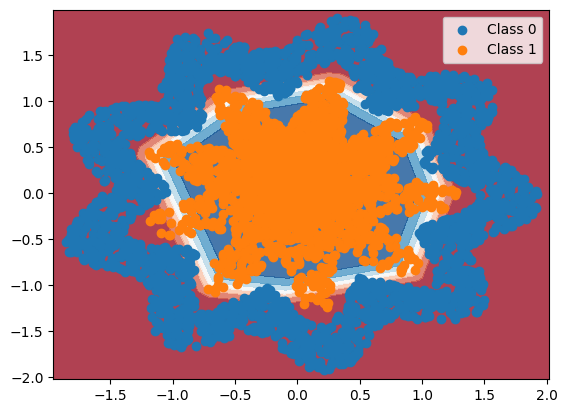

In [33]:
h = 0.01
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z  = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(c1[:,0], c1[:,1], label='Class 0')
plt.scatter(c2[:,0], c2[:,1], label='Class 1')
plt.legend()
plt.show()